In [2]:
import cv2 as cv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
im_in_actual = cv.imread("C:\\SteamCondChamber\\imagesM26C10V25T38P418\\image_0.tif")
frame_rate = 0

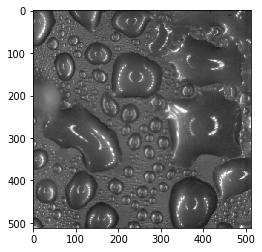

In [8]:
#print(im_in_actual)
plt.imshow(im_in_actual)
plt.show()

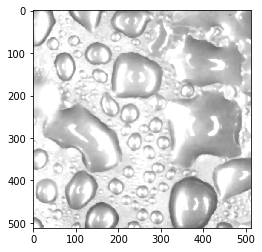

In [10]:
new_image = np.zeros(im_in_actual.shape, im_in_actual.dtype)
alpha = 2.5  # Simple contrast control
beta = 10  # Simple brightness control
for y in range(im_in_actual.shape[0]):
    for x in range(im_in_actual.shape[1]):
        for c in range(im_in_actual.shape[2]):
            new_image[y, x, c] = np.clip(alpha * im_in_actual[y, x, c] + beta, 0, 255)
new_image = cv.medianBlur(new_image, 3)
new_image = cv.medianBlur(new_image, 5)
new_image = cv.medianBlur(new_image, 3)
im_in_original = new_image
#cv.imwrite(f"L_image_{frame_rate}.tif", im_in_original)
plt.imshow(im_in_original)
plt.show()

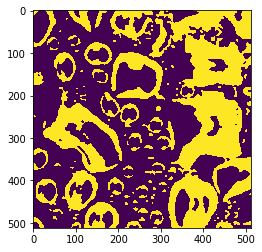

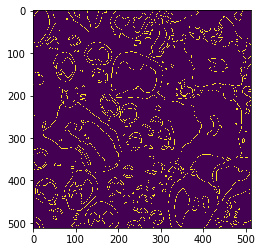

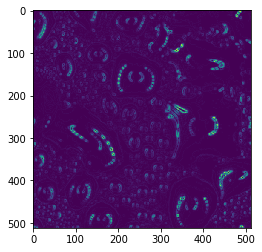

True

In [29]:
def unsharp_mask(image, kernel_size=(9, 9), sigma=2.0, amount=2.0, threshold=0):
    blurred = cv.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

def adjust_gamma(image, gamma=3.5):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

new_image2 = np.zeros(im_in_actual.shape, im_in_actual.dtype)
alpha = 0.5  # Simple contrast control
beta = 70  # Simple brightness control
for y in range(im_in_actual.shape[0]):
    for x in range(im_in_actual.shape[1]):
        for c in range(im_in_actual.shape[2]):
            new_image2[y, x, c] = np.clip(alpha * im_in_actual[y, x, c] + beta, 0, 255)
gamma_image = adjust_gamma(new_image2, gamma=0.2)
src = gamma_image
window_name = ('Sobel Demo - Simple Edge Detector')
scale = 1
delta = 0
ddepth = cv.CV_16S
src = cv.GaussianBlur(src, (3, 3), 0)
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
cv.imwrite(f"S_G_E_image_{frame_rate}.tif", grad)
im_in = grad
plt.imshow(grad)
plt.show()
cv.imwrite(f"SORVBEL0.5{frame_rate}.tif", grad)


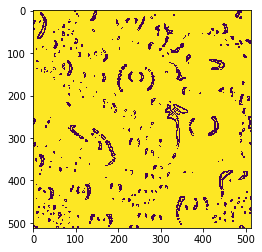

'\nkernel = np.ones((3, 3), np.uint8)\n\nerosion3 = cv.erode(im_th, kernel, iterations=1)\ndilation3 = cv.dilate(erosion3, kernel, iterations=1)\nerosion2 = cv.erode(dilation3, kernel, iterations=1)\ndilation2 = cv.dilate(erosion2, kernel, iterations=1)\nerosion = cv.erode(dilation2, kernel, iterations=1)\ndilation = cv.dilate(erosion, kernel, iterations=1)\n#cv.imwrite(f"dilation_{frame_rate}.tif", dilation)\n\ndilation = cv.cvtColor(dilation, cv.COLOR_BGR2GRAY)\n\n\nedges = cv.Canny(dilation, 10, 50, apertureSize=3)\n#cv.imwrite(f"cannyANDdilation_{frame_rate}.tif", edges)\n\nplt.imshow(dilation)\nplt.show()\nplt.imshow(edges)\nplt.show()\n'

In [27]:
th, im_th = cv.threshold(im_in, 100, 255, cv.THRESH_BINARY_INV);
plt.imshow(im_th)
plt.show()
cv.imwrite(f"im th{frame_rate}.tif", im_th)
"""
kernel = np.ones((3, 3), np.uint8)

erosion3 = cv.erode(im_th, kernel, iterations=1)
dilation3 = cv.dilate(erosion3, kernel, iterations=1)
erosion2 = cv.erode(dilation3, kernel, iterations=1)
dilation2 = cv.dilate(erosion2, kernel, iterations=1)
erosion = cv.erode(dilation2, kernel, iterations=1)
dilation = cv.dilate(erosion, kernel, iterations=1)
#cv.imwrite(f"dilation_{frame_rate}.tif", dilation)

dilation = cv.cvtColor(dilation, cv.COLOR_BGR2GRAY)


edges = cv.Canny(dilation, 10, 50, apertureSize=3)
#cv.imwrite(f"cannyANDdilation_{frame_rate}.tif", edges)

plt.imshow(dilation)
plt.show()
plt.imshow(edges)
plt.show()
"""

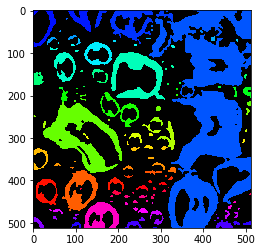

In [20]:
def CC(img):
    nlabels, labels, stats, centroids = cv.connectedComponentsWithStats(img)
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0
    return labeled_img, nlabels, labels, stats, centroids


components, nlabels, labels, stats, centroids = CC(dilation)

plt.imshow(components)
plt.show()
